## Central Limit Theorem

The central limit theorem states that if you have a population with mean $ \mu_{p} $ and standard deviation $ \sigma_{p} $ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed with a standard deviation (standard error) given by

$ \large \sigma_{\bar{x}} = \dfrac{\sigma_p}{\sqrt{n}} $    

where $ n $ is the size of each sample

In [2]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Example of distribution of sample means for population $ \mu = 20 $ and $ \sigma =5 $

Notice as the sample size n increases, the standard error decreases. As n approaches the population 

Text(0, 0.5, 'Probability')

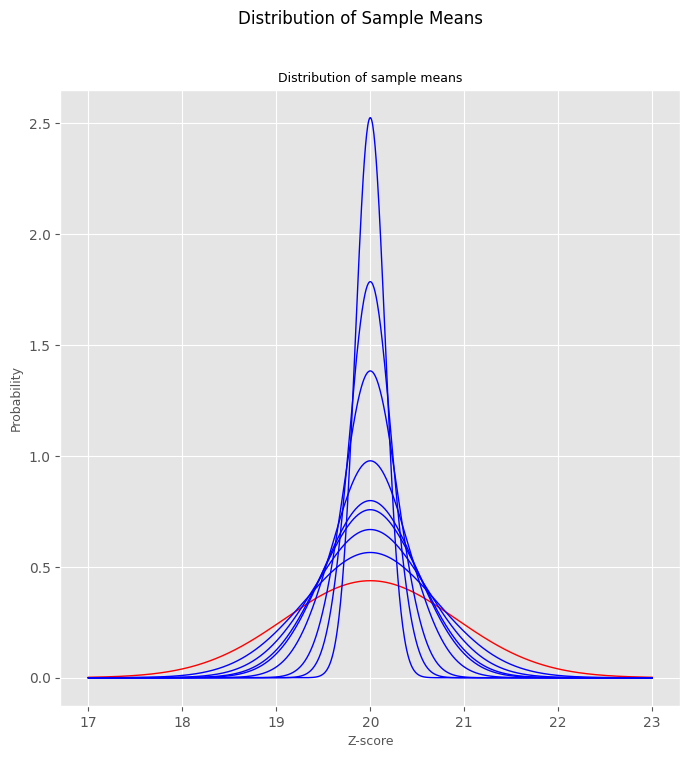

In [9]:
mu = 20
sigma = 5
x = np.linspace(17, 23, 1000)

# font size
fs = 9

plt.figure(figsize=(8,8))
plt.suptitle("Distribution of Sample Means")

n = 30
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'r') 

n = 50
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

n = 70
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

n = 90
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

n = 100
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

n = 150
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

n = 300
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

n = 500
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

n = 1000
plt.plot(x, stats.norm.pdf(x, mu, sigma/np.sqrt(n)), linewidth = 1, color= 'b') 

plt.title(f"Distribution of sample means", fontsize=fs)
plt.xlabel("Z-score", fontsize=fs)
plt.ylabel("Probability", fontsize=fs)

# plt.tight_layout()


### Sample Means from Uniform Distribution

Generate samples from a uniform continuous distribution

mean=0.5 , std=0.28867513459481287, skew=0.0, kurtosis=-1.2 



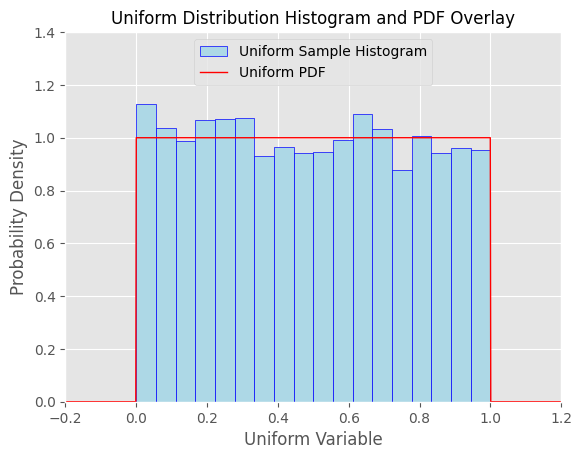

In [3]:
# random seed
np.random.seed(10)

# number of samples
samples = 5000

# generate uniform random samples
y = stats.uniform.rvs(0, 1, samples)

mean, var, skew, kurt = stats.uniform.stats(moments='mvsk')

print(f"mean={mean} , std={np.sqrt(var)}, skew={skew}, kurtosis={kurt} \n")

# plot histogram of unfirom samples
plt.xlim(-0.2,1.2)
plt.hist(y, bins='auto', density=True, color="lightblue", edgecolor='blue', label="Uniform Sample Histogram") 

# plot overlay of unifrom pdf
x=np.linspace(-0.2, 1.2, 1000)
plt.ylim(0, 1.4)
plt.plot(x, stats.uniform.pdf(x), linewidth=1, color='r', label="Uniform PDF")

plt.title("Uniform Distribution Histogram and PDF Overlay", fontsize=12)
plt.xlabel("Uniform Variable")
plt.ylabel("Probability Density")
plt.legend(loc='upper center')

plt.show()

Now generate 5000 samples of n=50 selections each, and plot the histogram of those means

In [4]:
# selections per sample
n = 50

# number of samples
m = 5000

sample_means = []

for i in range(0, m+1):
  sample_means.append(np.mean(stats.uniform.rvs(0, 1, n))) 
  
print(sample_means[:10])

[0.46358779460087474, 0.49611025967454125, 0.5668425060462854, 0.4746070866601108, 0.4340911050450028, 0.4898701565338905, 0.4404160734419607, 0.472304094190978, 0.5412313181597058, 0.5177317314786444]


Now plot the sample means on a histogram. As stated by the central limit theorem, this will be a normal distribution with standard deviation (standard error) equal to $ \large \sigma_{\bar{x}} = \frac{\sigma_p}{\sqrt{n}} $

A uniform distribution between 0 and 1 has a mean of $ \mu_{p} = 0.5 $ and a standard deviation of $ \sigma_{p} = 0.289 $

Therefore the standard error will equal $ \large \sigma_{\bar{x}} = \dfrac{\sigma_p}{\sqrt{n}} = \dfrac{0.289}{\sqrt{50}} = 0.0409$

Note: the standad deviation of the sample means below matches the standard error in the formula


mean of sample means = 0.49995385571347106
standard deviation (standard error) of sample means = 0.04088930189502386


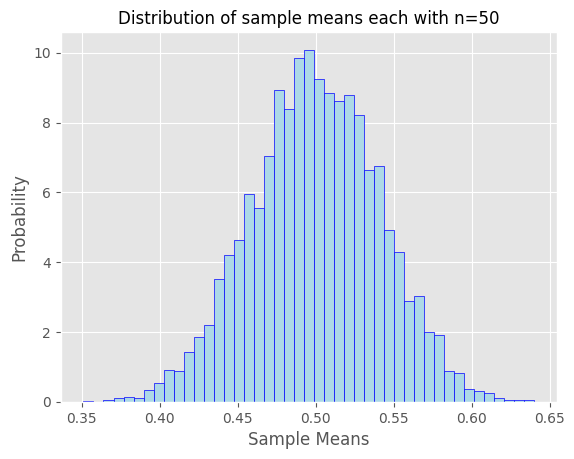

In [5]:
print(f"mean of sample means = {np.mean(sample_means)}")
print(f"standard deviation (standard error) of sample means = {np.std(sample_means)}")

# plot histogram of sample means
plt.hist(sample_means, bins='auto', ecolor="lightblue", edgecolor='blue', label="Uniform Sample Histogram") 

plt.title("Distribution of sample means each with n=50", fontsize=12)
plt.xlabel("Sample Means")
plt.ylabel("Probability")

plt.show()

#### Increase Sample Size

As the sample size increases, the standard error decreases and the probability distribution of the sample errors is therefore in a narrower region

if n = 2000

$ \large \sigma_{\bar{x}} = \dfrac{\sigma_p}{\sqrt{n}} = \dfrac{0.289}{\sqrt{500}} = 0.0129$

This result is close to the one obtained below from the standard deviation of the sample means.

Increasing the sample size narrows the possible sample means region and the closer to the population mean.

mean of sample means = 0.4999505151692893
standard deviation (standard error) of sample means = 0.01283718798237347


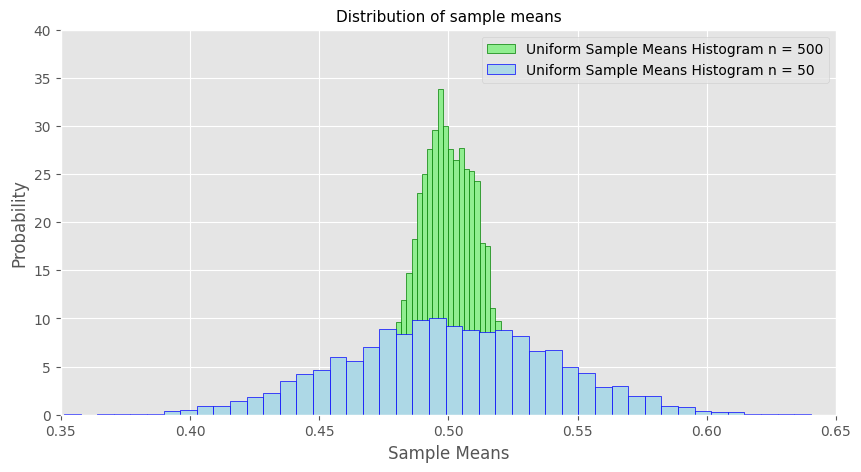

In [26]:
# selections per sample
n = 500

# number of samples
m = 5000

sample_means_b = []

for i in range(0, m+1):
  sample_means_b.append(np.mean(stats.uniform.rvs(0, 1, n))) 

print(f"mean of sample means = {np.mean(sample_means_b)}")
print(f"standard deviation (standard error) of sample means = {np.std(sample_means_b)}")

plt.figure(figsize=(10, 5))
plt.xlim(0.35, 0.65)
plt.ylim(0, 40)

# histogram of n = 2000 selections per sample
plt.hist(sample_means_b, bins='auto', density=True, color='lightgreen', edgecolor='green', label="Uniform Sample Means Histogram n = 500") 

# histogram of n = 50 selections per sample
plt.hist(sample_means, bins='auto', density=True, color='lightblue', edgecolor='blue', label="Uniform Sample Means Histogram n = 50") 

plt.title(f"Distribution of sample means", fontsize=11)
plt.xlabel("Sample Means")
plt.ylabel("Probability")

plt.legend(loc="upper right")

plt.show()